# WordCloud

In [1]:
!pip install konlpy
import re
import konlpy
import pandas as pd

In [2]:
!pip install matplotlib 
!conda install matplotlib 
!pip install matplotlib --upgrade
!pip show 
!pip install -U plotly

import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Solving environment: \ 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::astropy==4.3.1=py39hf9932de_0
  - defaults/osx-64::anaconda==2021.11=py39_0
  - defaults/osx-64::scikit-image==0.18.3=py39hae1ba45_0
  - defaults/noarch::seaborn==0.11.2=pyhd3eb1b0_0
  - defaults/osx-64::matplotlib==3.4.3=py39hecd8cb5_0
done

## Package Plan ##

  environment location: /Users/chaeeunkim/opt/anaconda3

  added / updated specs:
    - matplotlib


The following NEW packages will be INSTALLED:

  _anaconda_depends  pkgs/main/osx-64::_anaconda_depends-2021.11-py39_0
  matplotlib-base    pkgs/main/osx-64::matplotlib-base-3.4.3-py39h0a11d32_0

The following packages will be UPDATED:

  certifi                          2021.10.8-py39hecd8cb5_0 --> 2021.10.8-py39hecd8cb5_2
  openssl                                 1.1.1l-h9ed2024_0 --> 1.1.1m-hca72f7f_0

The following packages will be DOWNGRADED:

  anaconda

In [3]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open('과제_뉴스 기사.txt', encoding='utf-8') as f:  #본인 디렉토리에 맞게 설정해주세요!
    text = f.readlines()
    

In [5]:
text_strip = [i.strip() for i in text if i != '\n']
text_join = ' '.join(text_strip)
#빈 줄과 양 끝단의 공백 제거
p = re.compile(r'\bclass\b')
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
okt = konlpy.tag.Okt()
okt_pos = okt.pos(filtered_content)

komoran = konlpy.tag.Komoran()
komoran.morphs(filtered_content)

komoran_nouns = komoran.nouns(filtered_content)

#이메일, 날짜 등 불용어 제거
from nltk.corpus import stopwords
stop_words = ['이오', '에다', '하오', '마오'] #한국어로 할 때는 직접 설정.
unique_Noun_words = set(komoran_nouns)
for word in unique_Noun_words:
    if word in stop_words or len(word) == 1:  #한 글자짜리 단어는 알아보기 어려워서 제거.
        while word in komoran_nouns:
            komoran_nouns.remove(word)

#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(komoran_nouns)
c

Counter({'대출금': 1,
         '리도': 1,
         '사상': 4,
         '최저': 5,
         '은행': 7,
         '예금': 4,
         '금리': 17,
         '시대': 2,
         '연간': 1,
         '만원': 1,
         '얘기': 2,
         '적금': 1,
         '수단': 1,
         '안전': 1,
         '보관': 1,
         '금고': 1,
         '대출': 15,
         '역대': 5,
         '기록': 2,
         '주식': 3,
         '부동산': 2,
         '한국은행': 1,
         '발표': 1,
         '6월': 3,
         '금융': 1,
         '기관': 1,
         '가중': 1,
         '평균': 4,
         '지난달': 1,
         '전월': 3,
         '대비': 3,
         '포인트': 2,
         '처음': 2,
         '정기예금': 1,
         '상품': 1,
         '수준': 2,
         '코로나': 1,
         '사태': 1,
         '이후': 1,
         '한은': 2,
         '기준': 2,
         '집계': 1,
         '가계': 4,
         '신용': 7,
         '주택': 3,
         '담보': 1,
         '대로': 1,
         '이번': 1,
         '정부': 1,
         '규제': 1,
         '강화': 1,
         '사람': 2,
         '때문': 2,
         '관계자': 1,
         '대책': 1

In [6]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

## 한글폰트 다운로드
나눔 폰트를 다운 받고 font_path를 저장해주세요. 이후 plt.rc를 활용해 폰트를 지정해주세요.

In [7]:
import matplotlib.font_manager as fm
#설치된 폰트 확인
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f] 
print(f"nanum_font number: {len(nanum_font)}") #나눔 폰트는 없음.

sys_font number: 353
['/System/Library/Fonts/Supplemental/STIXIntDReg.otf', '/System/Library/Fonts/Supplemental/Seravek.ttc', '/System/Library/Fonts/Supplemental/NotoSansRejang-Regular.ttf', '/System/Library/Fonts/Supplemental/STIXSizThreeSymReg.otf', '/System/Library/Fonts/Supplemental/NotoSansManichaean-Regular.ttf', '/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf', '/System/Library/Fonts/Avenir Next.ttc', '/System/Library/Fonts/Supplemental/Papyrus.ttc', '/System/Library/Fonts/Supplemental/Telugu Sangam MN.ttc', '/System/Library/Fonts/Apple Color Emoji.ttc', '/System/Library/Fonts/Supplemental/NotoSansGlagolitic-Regular.ttf', '/System/Library/Fonts/Supplemental/STIXVarBol.otf', '/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf', '/System/Library/Fonts/Supplemental/Arial Narrow Bold Italic.ttf', '/System/Library/Fonts/NotoNastaliq.ttc', '/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', '/Library/Fonts/Arial Unicode.ttf', '/System/Library/Fonts/Supplemental/No

In [8]:
#나눔 폰트 업로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

zsh:1: command not found: apt-get
zsh:1: no matches found: fonts-nanum*


In [13]:
# 체크해보면 폰트 개수가 늘어났다
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 353
nanum_font number: 0


In [14]:
nanum_font

[]

In [9]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.9.7
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [10]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

FileNotFoundError: [Errno 2] No such file or directory: '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

## 워드클라우드 시각화
단어별 빈도분석이 저장된 c 라는 객체를 WordCloud 시각화해주세요.

Hint: 
<br>wordcloud = WordCloud(~~~)
<br>wordcloud.generate_from_frequencies(c)
<br>wordcloud.to_image()
<br>잘 모르시겠으면 Notion에 업로드된 텍스트 마이닝의 워드클라우드 강의를 참고해주세요.

In [11]:
!pip install wordcloud

In [12]:
from collections import Counter
c = Counter(komoran_nouns)
c['아내'] #dictionary처럼 특정 단어가 몇 번 등장하는지 볼 수도 있고
print(c) #전체를 다 프린트 해서 볼 수도 있음. 빈도수가 많은 것 순서로 나타남.

Counter({'금리': 17, '대출': 15, '은행': 7, '신용': 7, '최저': 5, '역대': 5, '사상': 4, '예금': 4, '평균': 4, '가계': 4, '증가': 4, '주식': 3, '6월': 3, '전월': 3, '대비': 3, '주택': 3, '시대': 2, '얘기': 2, '기록': 2, '부동산': 2, '포인트': 2, '처음': 2, '수준': 2, '한은': 2, '기준': 2, '사람': 2, '때문': 2, '거래': 2, '우량': 2, '차주': 2, '비율': 2, '투자': 2, '예탁금': 2, '대출금': 1, '리도': 1, '연간': 1, '만원': 1, '적금': 1, '수단': 1, '안전': 1, '보관': 1, '금고': 1, '한국은행': 1, '발표': 1, '금융': 1, '기관': 1, '가중': 1, '지난달': 1, '정기예금': 1, '상품': 1, '코로나': 1, '사태': 1, '이후': 1, '집계': 1, '담보': 1, '대로': 1, '이번': 1, '정부': 1, '규제': 1, '강화': 1, '관계자': 1, '대책': 1, '전후': 1, '매매': 1, '전세': 1, '관련': 1, '신용등급': 1, '전체': 1, '현상': 1, '설명': 1, '시장': 1, '속도': 1, '최대': 1, '늦기 전에': 1, '사자': 1, '패닉': 1, '수요': 1, '주범': 1, '해석': 1, '신용거래': 1, '융자': 1, '잔액': 1, '최고': 1, '경신': 1, '지난해': 1, '규모': 1, '증시': 1, '대기': 1, '자금': 1, '투자자': 1, '기후': 1, '기자': 1, '조선일보': 1, '무단': 1, '전재': 1, '배포': 1, '금지': 1})


In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

In [14]:
# 한글 폰트를 가져와야 함.(본인 컴퓨터에서 가져오면 됨.)
FONT_PATH = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'

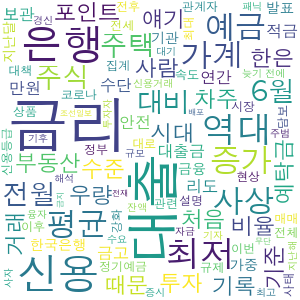

In [16]:
wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    relative_scaling='auto', 
    font_path=FONT_PATH, 
    background_color='white')
wordcloud.generate_from_frequencies(c) 
wordcloud.to_image()

# Bike Sharing Demand

출처: https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

## Load Dataset

첨부된 train 데이터를 불러와주세요.

In [12]:
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## 전처리
datetime의 data를 연/월/일/시간/분/초/요일로 쪼개서 새로운 컬럼에 담아주세요.
전처리 하고 나면 연 컬럼, 월 컬럼부터 초 컬럼, 요일 컬럼까지 총 7개의 컬럼이 추가 되어야합니다.
<br>Hint:파이썬에 내장된 .dt 함수를 활용해주세요.

In [37]:
import datetime as dt

train["datetime"]

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [38]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S', errors='raise')


In [42]:
train["year"] = train['datetime'].dt.year
train["month"] = train['datetime'].dt.month
train["day"] = train['datetime'].dt.day
train["hour"] = train['datetime'].dt.hour
train["minute"] = train['datetime'].dt.minute
train["second"] = train['datetime'].dt.second
train["weekday"] = train["datetime"].dt.weekday
#train[""] = train['datetime'].dt.year

In [43]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


datetime의 요일 컬럼을 사람이 알아보기 쉽게 Monday~Sunday로 바꿔주세요.
dt 함수를 사용하셨다면 다음과 같이 바꾸시면 됩니다.
<br> 0 = Monday
<br> 1 = Tuesday
<br> 2 = Wednesday
<br> 3 = Thursday
<br> 4 = Friday
<br> 5 = Saturday
<br> 6 = Sunday

In [44]:
week_str = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

for i in range(len(train["weekday"])):
    index = int(train["weekday"][i])
    train["weekday"][i] = week_str[index]
    
train.head()

/var/folders/x8/z8kck_j52x55q_mb_869y11r0000gn/T/ipykernel_760/2707695640.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["weekday"][i] = week_str[index]
/Users/chaeeunkim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


In [36]:
int(train["weekday"][1])

ValueError: invalid literal for int() with base 10: 'Saturday'

In [58]:
for i in range(len(train["weekday"])):
    if train["weekday"][i] == 0:
        train["weekday"][i] = "Monday"
    elif train["weekday"][i] == 1:
        train["weekday"][i] = "Tuesday"
    elif train["weekday"][i] == 2:
        train["weekday"][i] = "wednesday"
    elif train["weekday"][i] == 3:
        train["weekday"][i] = "Thursday"
    elif train["weekday"][i] == 4:
        train["weekday"][i] = "Friday"
    elif train["weekday"][i] == 5:
        train["weekday"][i] = "Saturday"
    elif train["weekday"][i] == 6:
        train["weekday"][i] = "Sunday"

train.head()

/var/folders/x8/z8kck_j52x55q_mb_869y11r0000gn/T/ipykernel_1526/2995719008.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["weekday"][i] = "Saturday"
/Users/chaeeunkim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


## 시각화



### 1)
연도별 자전거 대여량과 월별 자전거 대여량을 시각화 해주세요.

이후 각 시각화한 plot에서 각자 인사이트를 도출해주세요.

<br> 힌트: barchart, 계절

In [80]:
byYear = train.groupby(['year']).count()
byYear = byYear[["datetime"]]
byYear = byYear.rename(columns={'datetime':'yearNum'})
byYear = byYear.reset_index()
byYear

,year,yearNum
0,2011,5422
1,2012,5464


<function matplotlib.pyplot.show(close=None, block=None)>

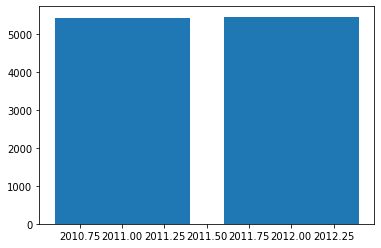

In [81]:
plt.bar(data=byYear,
        x='year',
        height='yearNum')
plt.show

In [ ]:
# 2011년과 2012년 자전거 대여량의 차이가 거의 없다

In [82]:
byMonth = train.groupby(['month']).count()
byMonth = byMonth[["datetime"]]
byMonth = byMonth.rename(columns={'datetime':'monthNum'})
byMonth = byMonth.reset_index()
byMonth



,month,monthNum
0,1,884
1,2,901
2,3,901
3,4,909
4,5,912
5,6,912
6,7,912
7,8,912
8,9,909
9,10,911


<function matplotlib.pyplot.show(close=None, block=None)>

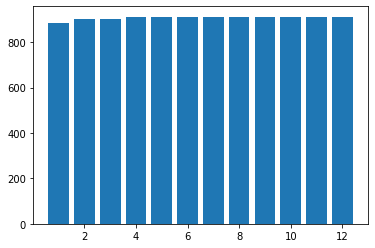

In [83]:
plt.bar(data=byMonth,
        x='month',
        height='monthNum')
plt.show

In [ ]:
# 1월과 2월에 자전거 대여량이 평균보다 낮고 나머지 달에는 자전거 대여량이 거의 비슷하다

###2)
연컬럼과 월컬럼을 합쳐주세요. 이후 2011년 1월부터 2012년 12월까지 월별 자전거 대여량을 시각화 해주세요. 

이전에 시각화한 월별 자전거 대여량 시각화 차트에서, 어째서 1월과 12월의 자전거 대여량의 차이가 크게 났는지 설명해주세요.

In [86]:
byYM = train.groupby(['year', 'month']).count()
byYM = byYM[["datetime"]]
byYM = byYM.rename(columns={'datetime':'monthNum'})
byYM = byYM.reset_index()
byYM

,year,month,monthNum
0,2011,1,431
1,2011,2,446
2,2011,3,446
3,2011,4,455
4,2011,5,456
5,2011,6,456
6,2011,7,456
7,2011,8,456
8,2011,9,453
9,2011,10,455


<AxesSubplot:xlabel='year', ylabel='count'>

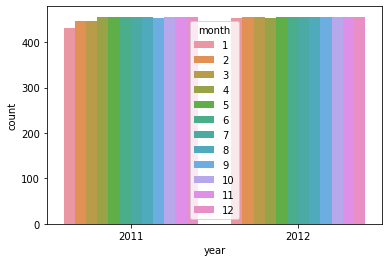

In [88]:
sns.countplot(data=train, x='year', hue='month')



<AxesSubplot:xlabel='month', ylabel='count'>

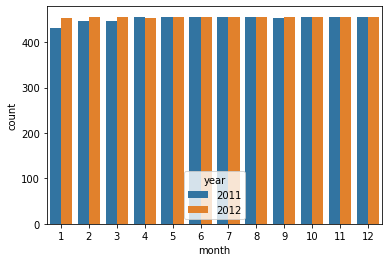

In [89]:
sns.countplot(data=train, x='month', hue='year')



# 2011년 1월의 자전거 대여량이 나머지 연도의 달보다 낮다.
# 2011년 1월의 자전거 대여량이 평균 연별/월별 자전거 대여량 보다 낮아서
# 전체적으로 1월달에 자전거 대여량이 낮은 것처럼 보였다.

###3)
아래의 정보가 나타나게 시각화 해주세요.
<br>1) 시간별 자전거 대여량
<br>2) 근무일/휴일에 따른 시간별 자전거 대여량
<br>3) 요일에 따른 시간별 자전거 대여량

이 플랏에서 인사이트를 도출해주세요.

Hint: pointplot, hue

In [ ]:
byHour = train.groupby(['hour']).count()
byHour = byHour[["datetime"]]
byHour = byHour.rename(columns={'datetime':'hourNum'})
byHour = byHour.reset_index()
byHour

,hour,hourNum
0,0,455
1,1,454
2,2,448
3,3,433
4,4,442
5,5,452
6,6,455
7,7,455
8,8,455
9,9,455


<function matplotlib.pyplot.show(close=None, block=None)>

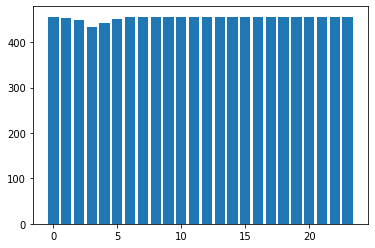

In [91]:
plt.bar(data=byHour,
        x='hour',
        height='hourNum')
plt.show

In [92]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,Saturday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,Saturday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,Saturday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,Saturday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,Saturday


<AxesSubplot:xlabel='holiday', ylabel='count'>

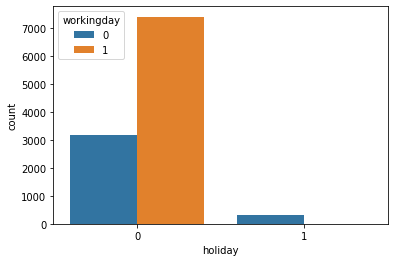

In [93]:
sns.countplot(data=train, x='holiday', hue='workingday')



In [ ]:
# 1위 holiday = 0 & workingday = 1
# 2위 holiday = 0 & workingday = 0
# 1위 holiday = 1 & workingday = 0
# 1위 holiday = 1 & workingday = 1

<AxesSubplot:xlabel='weekday', ylabel='count'>

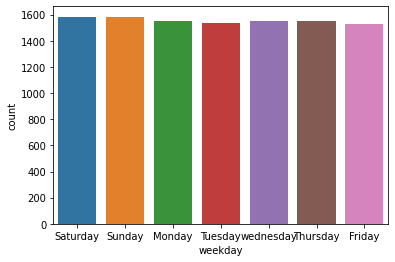

In [95]:
sns.countplot(data=train, x='weekday')


In [ ]:
# 주말의 자전거 대여량이 평일보다 아주 조금 더 높다

# mpg


## Load Dataset
seaborn을 이용해 'mpg'데이터셋을 불러와주세요.

In [98]:
# 데이터셋 불러오기
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 시각화

model_year과 mpg 데이터 값을 산점도로 보여주고, 그 간의 선형관계를 선으로 보여주세요.
<br> Hint: regplot

<AxesSubplot:xlabel='model_year', ylabel='mpg'>

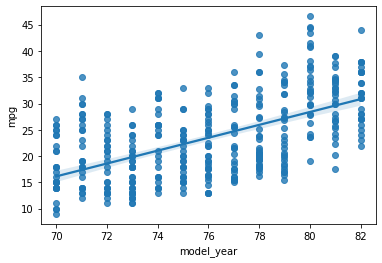

In [99]:
sns.regplot(x='model_year', y='mpg', data=mpg)

너무너무 고생 많으셨습니다!! 시각화 세션 화이팅하세요ㅎㅎㅎ
